In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('fivethirtyeight')
import os
import seaborn as sns ## plotting histograms

In [9]:
from subprocess import check_output

In [12]:
tennis_df = pd.read_csv('data.csv', encoding = 'latin1' )  #dtype='unicode'#) # Read Data

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
tennis_df.WRank = pd.to_numeric(tennis_df.WRank, errors = 'coerce') 
tennis_df.LRank = pd.to_numeric(tennis_df.LRank, errors = 'coerce')
# New Feature: Rank difference betweehn the 2 oponents
tennis_df['Diff'] =  tennis_df.LRank - tennis_df.WRank 
# New Feature: Round the rank difference to 10's and 20's
tennis_df['Round_10'] = 10*round(np.true_divide(tennis_df.Diff,10))
tennis_df['Round_20'] = 20*round(np.true_divide(tennis_df.Diff,20))
# New Feature: Total number of sets in the match
tennis_df['Total Sets'] = tennis_df.Wsets + tennis_df.Lsets

In [14]:
tennis_df.W3 = tennis_df.W3.fillna(0)
tennis_df.W4 = tennis_df.W4.fillna(0)
tennis_df.W5 = tennis_df.W5.fillna(0)
tennis_df.L3 = tennis_df.L3.fillna(0)
tennis_df.L4 = tennis_df.L4.fillna(0)
tennis_df.L5 = tennis_df.L5.fillna(0)

tennis_df['Sets Diff'] = tennis_df.W1+tennis_df.W2+tennis_df.W3+tennis_df.W4+tennis_df.W5-(tennis_df.L1+tennis_df.L2+tennis_df.L3+tennis_df.L4+tennis_df.L5)
new_df = tennis_df 

In [15]:
# 2 New Data Frames: Grand Slam data frame (GS) and non-Grand Slam data frame (non GS)
df_non_GS = new_df[~(new_df.Series == 'Grand Slam')]
df_GS = new_df[new_df.Series == 'Grand Slam']

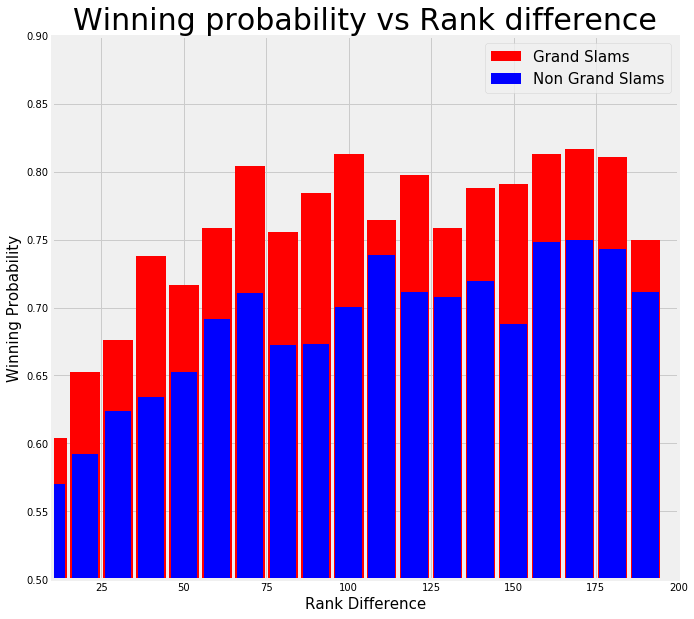

In [16]:
#%% Winning probability vs Rank Difference
plt.figure(figsize = (10,10))
bins = np.arange(10,200,10)
Gs_prob = []
non_Gs_prob = []

for value in bins:
    pos = value
    neg = -value
    
    pos_wins = len(df_GS[df_GS.Round_10 == pos])
    neg_wins = len(df_GS[df_GS.Round_10 == neg])
    Gs_prob.append(np.true_divide(pos_wins,pos_wins + neg_wins))
    
    pos_wins = len(df_non_GS[df_non_GS.Round_10 == pos])
    neg_wins = len(df_non_GS[df_non_GS.Round_10 == neg])
    non_Gs_prob.append(np.true_divide(pos_wins,pos_wins + neg_wins))
    
    
plt.bar(bins,Gs_prob,width = 9, color = 'red') 
plt.bar(bins,non_Gs_prob,width = 8, color = 'blue')
plt.title('Winning probability vs Rank difference', fontsize = 30)
plt.xlabel('Rank Difference',fontsize = 15)
plt.ylabel('Winning Probability',fontsize = 15)
plt.xlim([10,200])
plt.ylim([0.5,0.9])
plt.legend(['Grand Slams', 'Non Grand Slams'], loc = 1, fontsize = 15)
plt.show()   